# 18장. CNN 모델

## Anaconda에서 개발환경 만들기

```bash
conda env create -f env_CH18.yml
conda activate mnist-classification
```

## 18.3 콘볼루션(Convolution)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from tensorflow.examples.tutorials.mnist import input_data
sess = tf.InteractiveSession()
mnist = input_data.read_data_sets("MNIST_data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### 18.3.1 커널(Kernel)/Filter

In [3]:
kernel0 = np.array([[0,1,0], [0, -2, 0], [0, 1, 0]]) # y-edge detection
kernel1 = np.array([[1,1,1], [1, -8, 1], [1,1,1]]) # xy-edge detection
kernel2 = np.array([[1,1,1], [1, 1, 1], [1,1,1]]) # Box Blur
kernel3 = np.array([[-1,-1,0], [-1, 0, 1], [0,1,1]]) # Emboss

kernel_list = [('y-edge', kernel0), ('xy-edge', kernel1), \
               ('blur', kernel2), ('embos', kernel3)] # 커널들 모아놓은 list

In [2]:
def plot_conv_example(conv_input, images, kernel_list):
    import inflect
    p = inflect.engine()
    plt.figure(figsize=(8,8))
    for j in range(len(images)):
        img = images[j].reshape(28,28)
        plt.subplot(5,5,1 + 5*j)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title('{0} input'.format(p.ordinal(j)))
        for k, (name, kernel) in enumerate(kernel_list):
            conv_out = tf.nn.conv2d(conv_input, kernel.reshape([3,3,1,1]), strides=[1,1,1,1], padding='SAME')
            conv_out_value = conv_out.eval(feed_dict={x_input: images[j].reshape(-1, 784)})
            plt.subplot(5,5,2+k + 5*j)
            plt.imshow(conv_out_value[0, :, :, 0], cmap='gray')
            plt.axis('off')
            plt.title(name)
    plt.show()

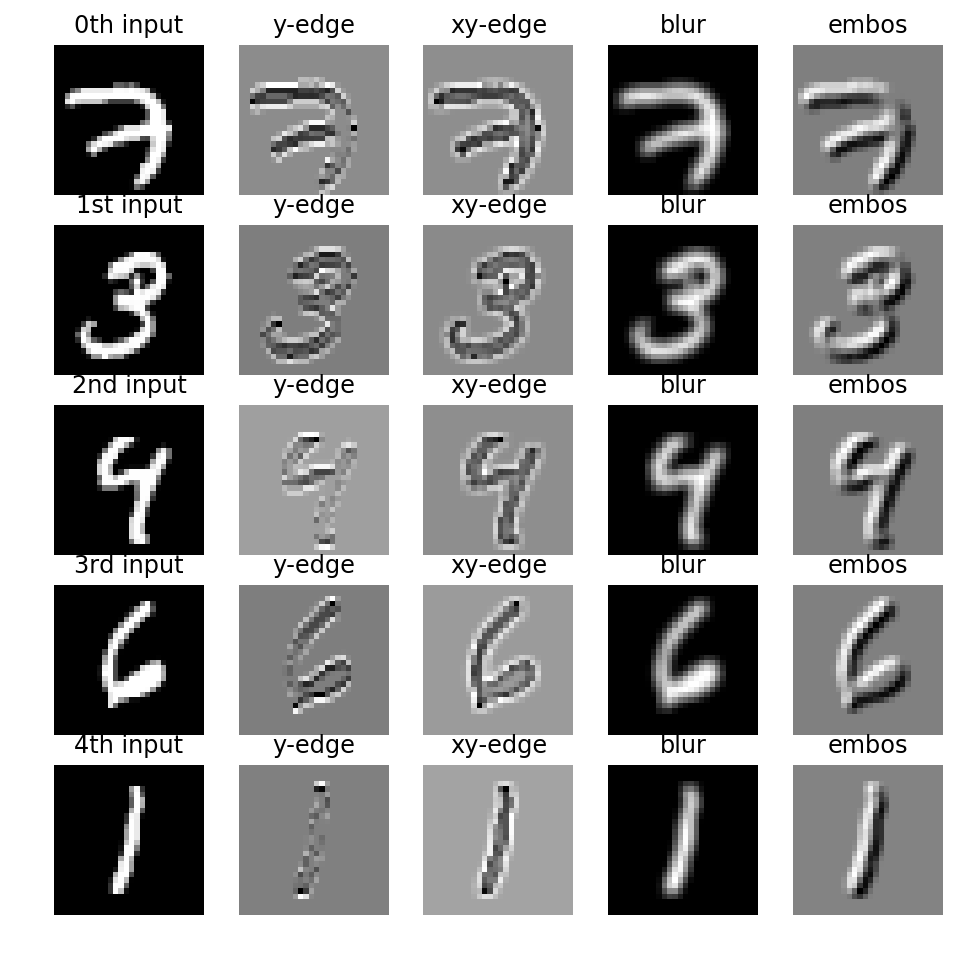

In [4]:
x_input = tf.placeholder(tf.float32, [None, 784])
conv_in = tf.reshape(x_input, shape=[1, 28, 28, 1])

plot_conv_example(conv_in, mnist.train.images[:5], kernel_list)

### 18.3.2 Strides

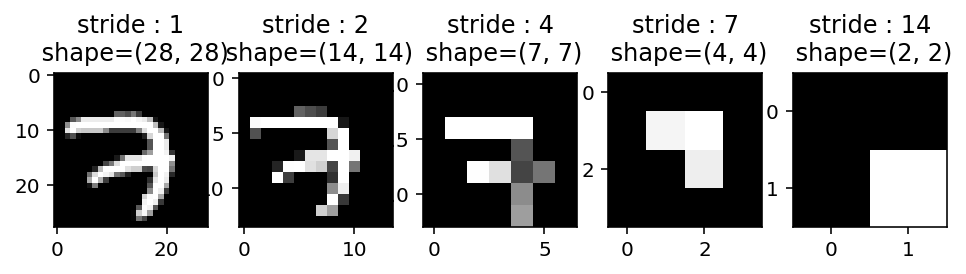

In [5]:
identity_kernel = np.array([[0,0,0], [0,1,0], [0,0,0]])
x_input = tf.placeholder(tf.float32, [None, 784])
conv_in = tf.reshape(x_input, shape=[1, 28, 28, 1])
plt.figure(figsize=(8,8))
for k, stride_num in enumerate([1, 2, 4, 7, 14], 1):
    plt.subplot(1,5,k)
    conv_out = tf.nn.conv2d(conv_in, identity_kernel.reshape([3,3,1,1]), \
                            strides=[1,stride_num,stride_num,1], padding='SAME')
    val = conv_out.eval(feed_dict={x_input:mnist.train.images[:1]})
    plt.imshow(val[0, :, :, 0], cmap='gray')
    plt.title('stride : {0}\n shape=({1}, {2})'.format(stride_num, conv_out.shape[1], conv_out.shape[2]))
plt.show()

### 18.3.3 Padding

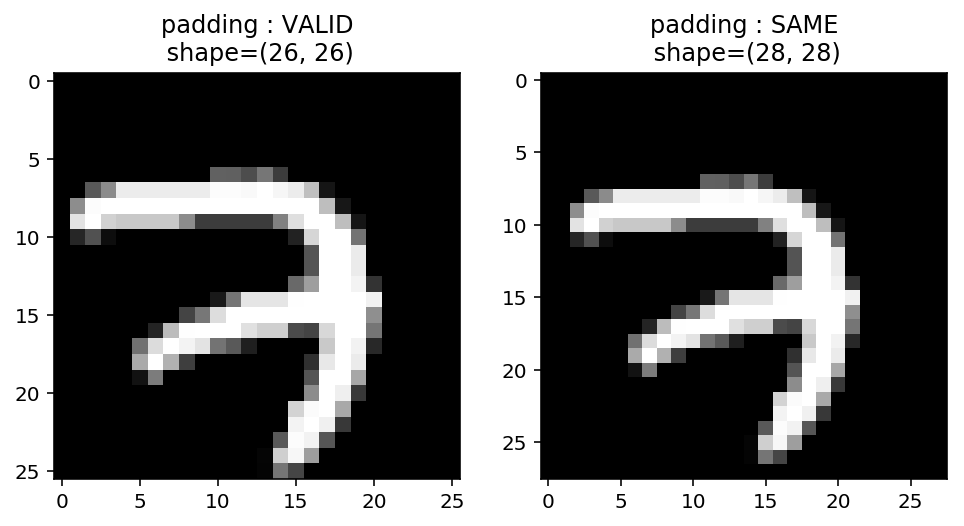

In [6]:
identity_kernel = np.array([[0,0,0], [0,1,0], [0,0,0]])
x_input = tf.placeholder(tf.float32, [None, 784])
conv_in = tf.reshape(x_input, shape=[1, 28, 28, 1])
plt.figure(figsize=(8,8))
for k, padding_style in enumerate(['VALID', 'SAME'], 1):
    plt.subplot(1,2,k)
    conv_out = tf.nn.conv2d(conv_in, identity_kernel.reshape([3,3,1,1]), \
                            strides=[1,1,1,1], padding=padding_style)
    val = conv_out.eval(feed_dict={x_input:mnist.train.images[:1]})
    plt.imshow(val[0, :, :, 0], cmap='gray')
    plt.title('padding : {0}\n shape=({1}, {2})'.format(padding_style, conv_out.shape[1], conv_out.shape[2]))
plt.show()

## 18.4 Max-Pooling

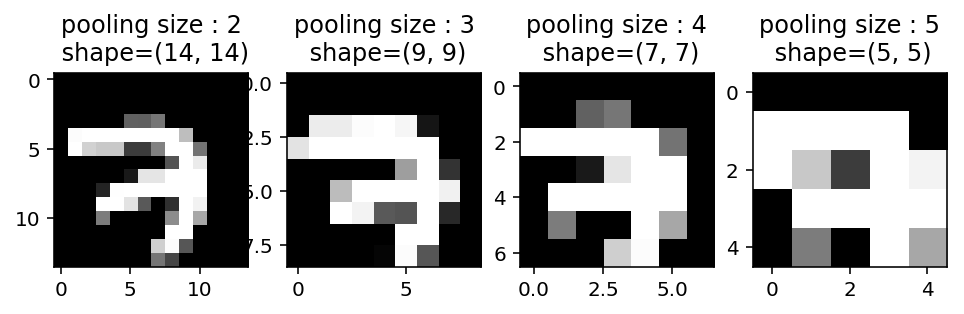

In [7]:
identity_kernel = np.array([[0,0,0], [0,1,0], [0,0,0]])
x_input = tf.placeholder(tf.float32, [None, 784])
conv_in = tf.reshape(x_input, shape=[1, 28, 28, 1])
plt.figure(figsize=(8,8))
for k, pooling_size in enumerate([2,3,4,5], 1):
    plt.subplot(1,4,k)
    conv_out = tf.layers.max_pooling2d(conv_in, pooling_size, pooling_size)
    val = conv_out.eval(feed_dict={x_input:mnist.train.images[:1]})
    plt.imshow(val[0, :, :, 0], cmap='gray')
    plt.title('pooling size : {0}\n shape=({1}, {2})'.format(pooling_size, conv_out.shape[1], conv_out.shape[2]))
plt.show()

### 18.8.1 데이터 훓어보기

In [8]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
print("="*40)
print("Train Data Shape : {0}".format(mnist.train.images.shape))
print("Train Label Shape : {0}".format(mnist.train.labels.shape))
print("Test Data Shape : {0}".format(mnist.test.images.shape))
print("Test Label Shape : {0}".format(mnist.test.labels.shape))

print("="*40)
for i in range(10):
    print("Train Label {0} : {1}".format(i, np.count_nonzero(mnist.train.labels == i)))
print("Train Total : {0}".format(len(mnist.train.labels)))

print("="*40)
for i in range(10):
    print("Test Label {0} : {1}".format(i, np.count_nonzero(mnist.test.labels == i)))
print("Test Total : {0}".format(len(mnist.test.labels)))

print("="*40)
print("Train > Min : {0}, Max : {1}".format(mnist.train.images.min(), mnist.train.images.max()))
print("Test > Min : {0}, Max : {1}".format(mnist.test.images.min(), mnist.test.images.max()))

Train Data Shape : (55000, 784)
Train Label Shape : (55000,)
Test Data Shape : (10000, 784)
Test Label Shape : (10000,)
Train Label 0 : 5444
Train Label 1 : 6179
Train Label 2 : 5470
Train Label 3 : 5638
Train Label 4 : 5307
Train Label 5 : 4987
Train Label 6 : 5417
Train Label 7 : 5715
Train Label 8 : 5389
Train Label 9 : 5454
Train Total : 55000
Test Label 0 : 980
Test Label 1 : 1135
Test Label 2 : 1032
Test Label 3 : 1010
Test Label 4 : 982
Test Label 5 : 892
Test Label 6 : 958
Test Label 7 : 1028
Test Label 8 : 974
Test Label 9 : 1009
Test Total : 10000
Train > Min : 0.0, Max : 1.0
Test > Min : 0.0, Max : 1.0


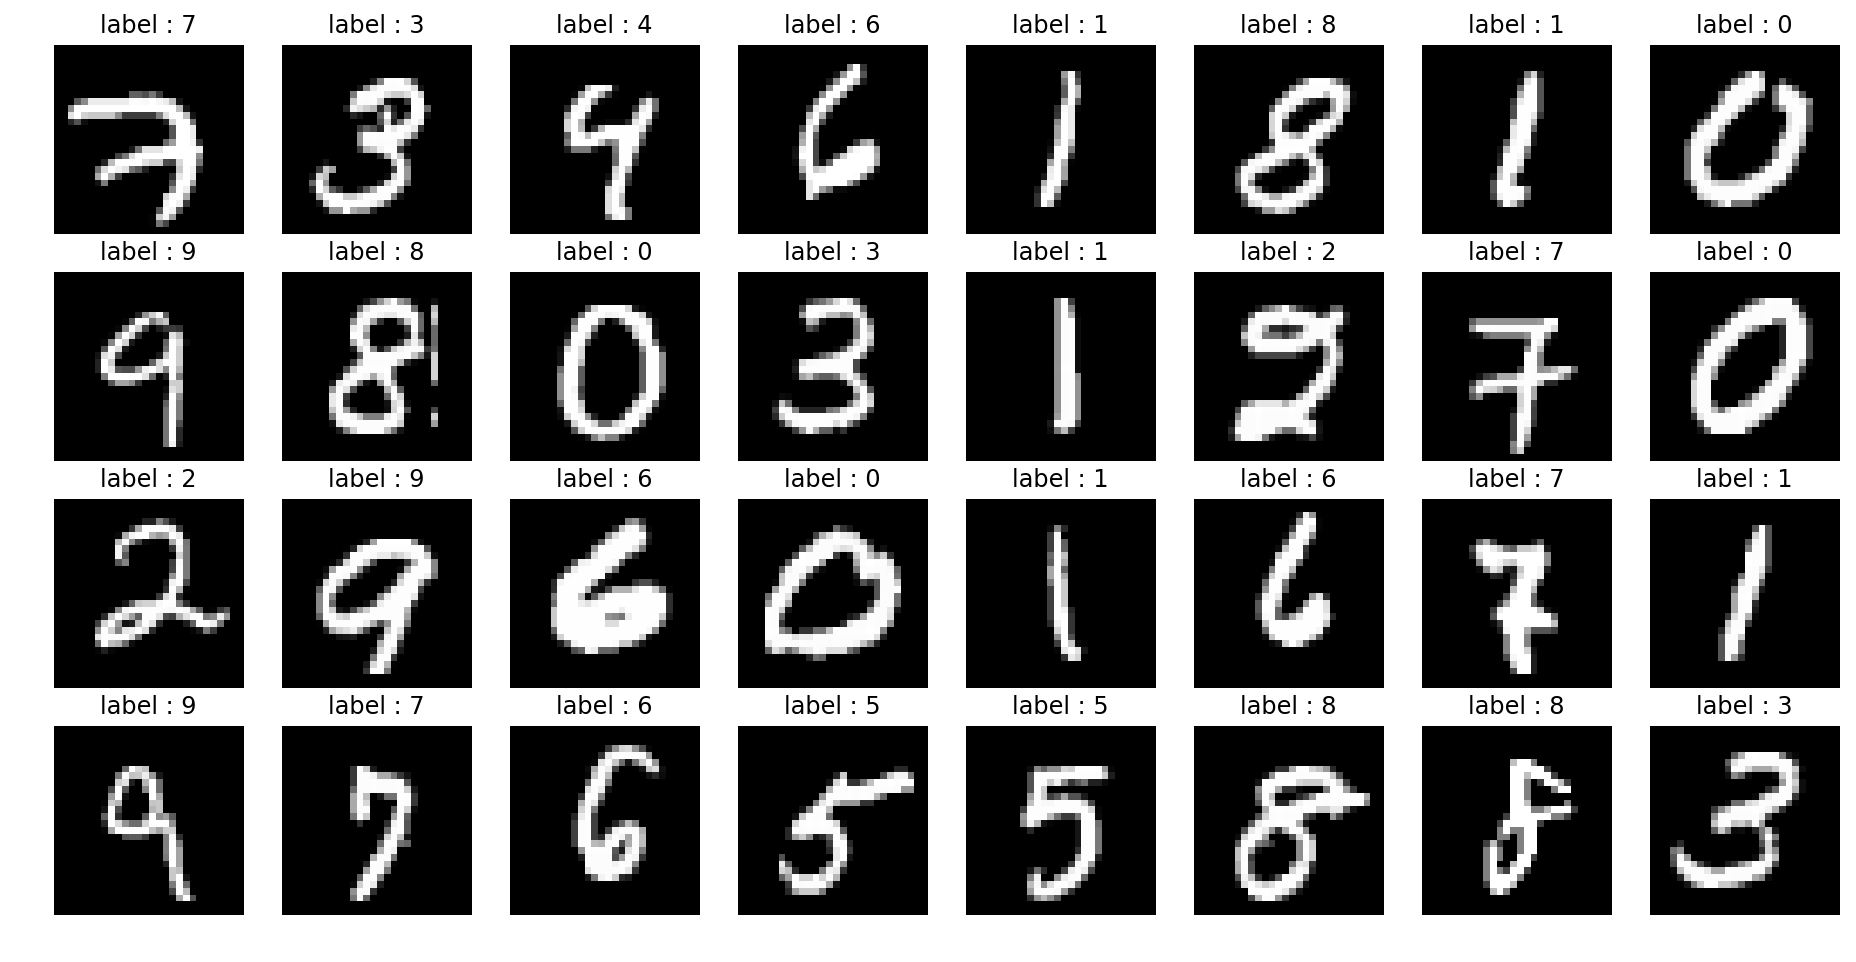

In [10]:
img_rows, img_cols = 28, 28
plt.figure(figsize=(16,8))
for k in range(32):
    img = mnist.train.images[k].reshape(img_rows,img_cols)
    label = mnist.train.labels[k]
    plt.subplot(4,8,1+k)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('label : {0}'.format(label))
plt.show()

### 18.8.2 One-Hot 인코딩

In [11]:
mnist = input_data.read_data_sets("MNIST_data/")
print(mnist.train.labels[:10])
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(mnist.train.labels[:10])
print(np.argmax(mnist.train.labels[:10], 1))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[7 3 4 6 1 8 1 0 9 8]
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[7 3 4 6 1 8 1 0 9 8]


In [12]:
x_train, y_train = mnist.train.images, mnist.train.labels
x_test, y_test = mnist.test.images, mnist.test.labels

### 18.8.3 CNN 모델 구축하기

In [13]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])

x_img = tf.reshape(x, shape=[-1, 28, 28, 1])
conv1 = tf.layers.conv2d(x_img, 32, 3, activation=tf.nn.relu)
conv1 = tf.layers.max_pooling2d(conv1, 2, 2)

conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
conv2 = tf.layers.max_pooling2d(conv2, 2, 2)

conv2 = tf.layers.dropout(conv2, 0.25)

fc1 = tf.contrib.layers.flatten(conv2)
fc1 = tf.layers.dense(fc1, 128, activation=tf.nn.relu)
conv2 = tf.layers.dropout(fc1, 0.5)

y = tf.placeholder(tf.float32, [None, 10])
model = tf.nn.softmax(tf.layers.dense(fc1, 10))

### 18.8.4 최적화 문제 설정

In [14]:
loss = tf.reduce_mean(tf.reduce_sum(-y * tf.log(model),1))
train = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(model,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### 18.8.5 하이퍼 파라미터 설정

In [15]:
batch_size = 64
MaxEpoch = 4

### 18.8.6 학습 시작

In [16]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for epoch in range(MaxEpoch):
    loss_val = 0.0
    for step in range(len(mnist.train.images) // batch_size + 1):
        x_batch, y_batch = mnist.train.next_batch(batch_size)
        batch_loss, _ = sess.run([loss, train], feed_dict={x:x_batch, y:y_batch})
        loss_val += batch_loss * len(x_batch)
    test_loss, test_acc = sess.run([loss, accuracy], feed_dict={x:mnist.test.images, y:mnist.test.labels})
    loss_val /= len(mnist.train.images)
    print('Epoch {0} : loss = {1:4.2E}, test_loss = {2:4.2E}, test_acc = {3:4.4f}'.format(epoch, loss_val, test_loss, test_acc))

Epoch 0 : loss = 1.68E-01, test_loss = 5.02E-02, test_acc = 0.9835
Epoch 1 : loss = 4.90E-02, test_loss = 3.86E-02, test_acc = 0.9872
Epoch 2 : loss = 3.22E-02, test_loss = 2.73E-02, test_acc = 0.9911
Epoch 3 : loss = 2.43E-02, test_loss = 3.02E-02, test_acc = 0.9895


### 18.8.7 정확도 확인

In [17]:
acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
print(acc)

0.9895
